In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path='/content/drive/My Drive/ObesityDataSet_raw_and_data_sinthetic.csv'
df=pd.read_csv(file_path)
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

#Checking Null values

In [ ]:
df.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# 2: EDA
Height Distribution

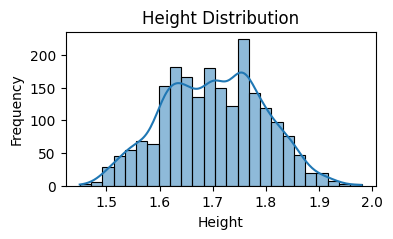

In [6]:
plt.figure(figsize=(4, 2))
sns.histplot(df['Height'], kde=True)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

Weight Distribution

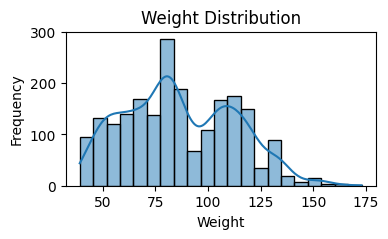

In [7]:
plt.figure(figsize=(4, 2))
sns.histplot(df['Weight'], kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

2. Top 10 Ages with highest weight




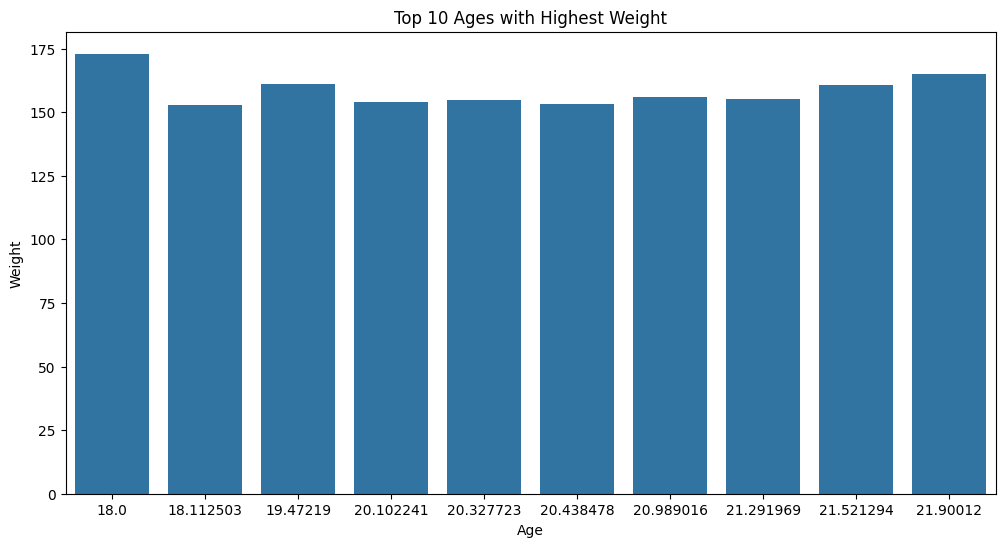

In [8]:
soretd_ages=df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Weight', data=soretd_ages.head(10))
plt.title('Top 10 Ages with Highest Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

3. Distribution of CAEC values

In [9]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

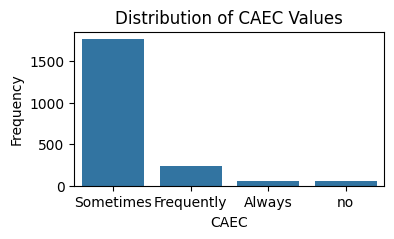

In [10]:
# Plot the distribution of CAEC values
plt.figure(figsize=(4, 2))
sns.countplot(x='CAEC', data=df, order = df['CAEC'].value_counts().index)
plt.title('Distribution of CAEC Values')
plt.xlabel('CAEC')
plt.ylabel('Frequency')
plt.show()

4. Average Ages with Family History with Overweight

In [11]:
# Calculate the average age for individuals with and without a family history of overweight
avg_age_family_history = df.groupby('family_history_with_overweight')['Age'].mean()

# Convert the result to a DataFrame for better readability
avg_age_family_history_df = avg_age_family_history.reset_index()
avg_age_family_history_df.columns = ['Family History with Overweight', 'Average Age']

print(avg_age_family_history_df)


  Family History with Overweight  Average Age
0                             no    21.549015
1                            yes    24.929043


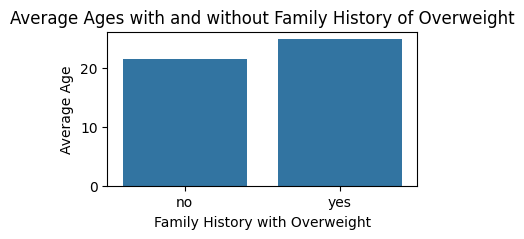

In [12]:
# Plot the average ages
plt.figure(figsize=(4, 2))
sns.barplot(x='Family History with Overweight', y='Average Age', data=avg_age_family_history_df)
plt.title('Average Ages with and without Family History of Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('Average Age')
plt.show()


5. Correlation matrix
--- for correlation we will convert categorical data to numeric data columns

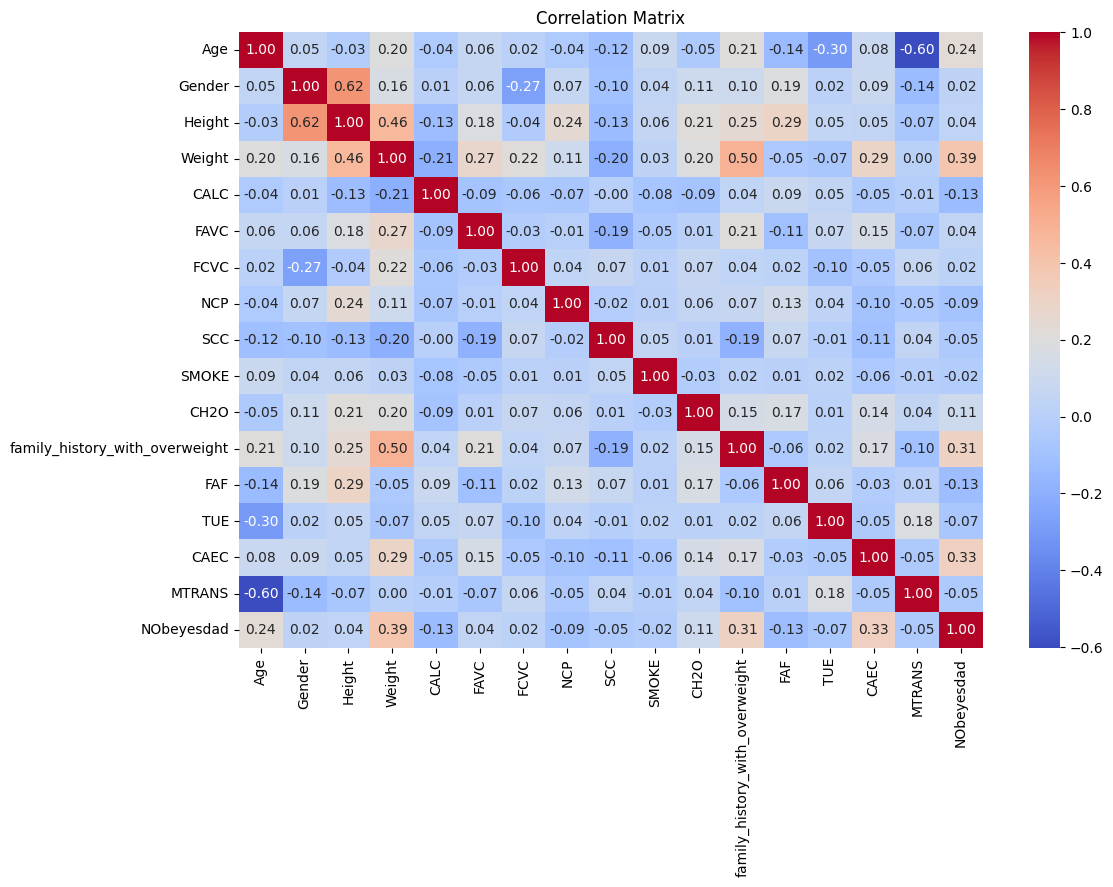

In [13]:
# Initialize label encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
label_encoder = LabelEncoder()
#create a copy of df
df_corr = df.copy()

# List of categorical columns
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
                       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

# Apply label encoding to each categorical column
for column in categorical_columns:
    df_corr[column] = label_encoder.fit_transform(df_corr[column])

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Step 3: Data Preprocessing: Carefully, apply label encoding to categorical columns and standard scalar to continuous columns. Apply one-hot encoding to only those columns which need it. Split the data set after this, you can use any train test split.

In [14]:
df.head(2)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#ordinal categorical columns
ordinal_cols = ['Gender', 'family_history_with_overweight', 'NObeyesdad']

# Apply label encoding to ordinal categorical columns
label_encoder = LabelEncoder()
for column in ordinal_cols:
    df[column] = label_encoder.fit_transform(df[column])

In [17]:
#nominal  cols
nominal_cols = ['CALC', 'FAVC', 'SCC', 'SMOKE', 'CAEC', 'MTRANS']

# Apply one-hot encoding to nominal categorical columns
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True).astype(int)

In [18]:
# List of continuous columns
continuous_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Apply standard scaling to continuous columns
scaler = StandardScaler()
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

In [19]:
df.head(2)

,Age,Gender,Height,Weight,FCVC,NCP,CH2O,family_history_with_overweight,FAF,TUE,...,FAVC_yes,SCC_yes,SMOKE_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.471293,0,0.0,-0.852616,-0.355724,0.574095,0.480342,1,-0.882428,1.062270,...,0,0,0,0,1,0,0,0,1,0
1,-0.471293,0,0.0,-1.159381,1.313015,0.574095,2.150858,1,2.720679,-0.654769,...,0,1,1,0,1,0,0,0,1,0


#Splitting Dataset

In [20]:

# Split the data into features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)  # Assuming 'NObeyesdad' is the target column
y = df['NObeyesdad']

# Split the data into training and testing and vaildation set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#temprary dataset 20% while training is 80%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1)

# Split the temporary set into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Verify the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1688, 23)
X_test shape: (212, 23)
y_train shape: (1688,)
y_test shape: (212,)


#Fitting the model Using RandomClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the  model on the validation set
y_pred =model.predict(X_val)
print("Baseline Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Baseline Validation Accuracy: 0.9052132701421801
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       0.69      0.80      0.74        25
           2       0.95      0.90      0.92        41
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        34
           5       0.92      0.74      0.82        31
           6       0.88      0.91      0.89        32

    accuracy                           0.91       211
   macro avg       0.91      0.91      0.91       211
weighted avg       0.91      0.91      0.91       211



#Confusion Matrix

In [22]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[34  0  0  0  0  0  0]
 [ 3 20  0  0  0  2  0]
 [ 0  2 37  0  0  0  2]
 [ 0  0  0 14  0  0  0]
 [ 0  0  0  0 34  0  0]
 [ 0  6  0  0  0 23  2]
 [ 0  1  2  0  0  0 29]]


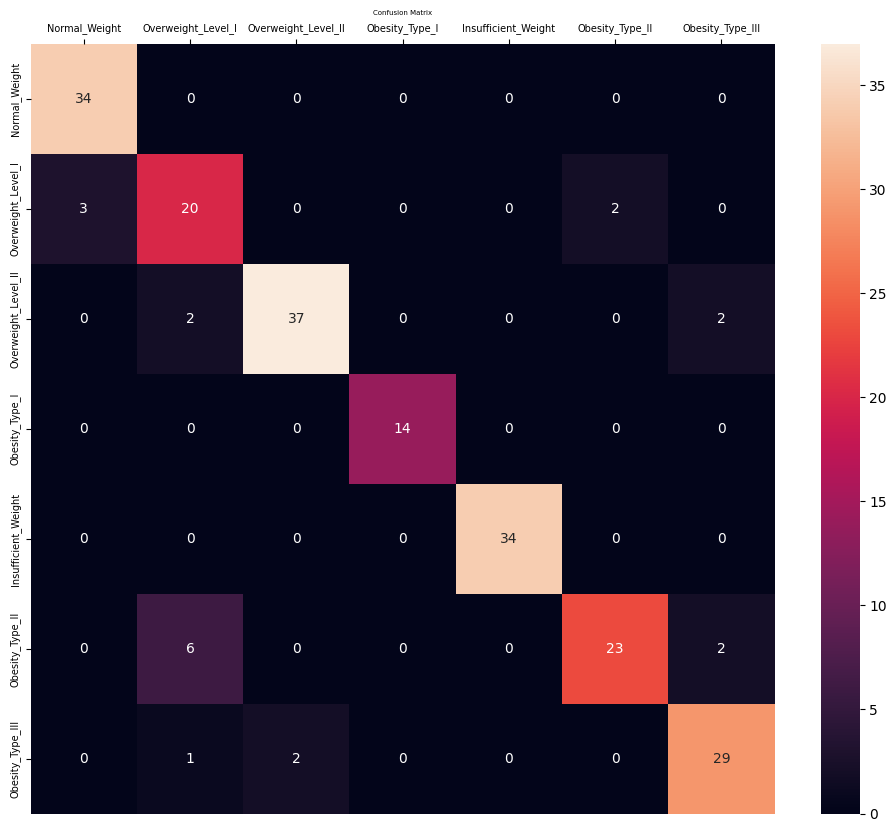

In [23]:
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_val,y_pred), annot=True, ax = ax, fmt = 'g');
ax.set_title('Confusion Matrix', fontsize=5)

ax.xaxis.set_ticklabels(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], fontsize = 7)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], fontsize = 7)
plt.show()

#Hyper Parameter Tuning

In [24]:
#hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [29]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_val_pred_tuned = best_rf.predict(X_val)
print("Confusion Matrix (Tuned):\n", confusion_matrix(y_val, y_val_pred_tuned))
print("Classification Report (Tuned):\n", classification_report(y_val, y_val_pred_tuned))

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Confusion Matrix (Tuned):
 [[34  0  0  0  0  0  0]
 [ 3 21  0  0  0  1  0]
 [ 0  1 36  1  0  0  3]
 [ 0  0  0 14  0  0  0]
 [ 0  0  0  0 34  0  0]
 [ 0  5  0  0  0 25  1]
 [ 0  1  2  0  0  0 29]]
Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       0.75      0.84      0.79        25
           2       0.95      0.88      0.91        41
           3       0.93      1.00      0.97        14
           4       1.00      1.00      1.00        34
           5       0.96      0.81      0.88        31
           6       0.88      0.91      0.89        32

    accuracy                           0.91       211
   macro avg       0.91      0.92      0.91       211
weighted avg       0.92      0.91      0.91       211

